In [1]:
from donut_sims import SimsToButler
import matplotlib.pyplot as plt
import numpy as np

In [2]:
stb = SimsToButler()
butler = stb.butler
registry = stb.registry

In [3]:
list(registry.queryDatasets(datasetType="zernikeEstimateAvg", collections=["mlStamps"]))[0]

DatasetRef(DatasetType('zernikeEstimateAvg', {band, instrument, detector, physical_filter, visit_system, visit}, NumpyArray), {instrument: 'LSSTCam', detector: 191, visit: 834463, ...}, id=23, run='mlStamps')

In [4]:
list(registry.queryDatasets(datasetType="zernikeEstimateAvg", collections=["mlStamps"]))[1]

DatasetRef(DatasetType('zernikeEstimateAvg', {band, instrument, detector, physical_filter, visit_system, visit}, NumpyArray), {instrument: 'LSSTCam', detector: 190, visit: 834463, ...}, id=25, run='mlStamps')

In [5]:
list(registry.queryDatasets(datasetType="donutStampsExtra", collections=["mlStamps"]))[0]

DatasetRef(DatasetType('donutStampsExtra', {band, instrument, detector, physical_filter, visit_system, visit}, StampsBase), {instrument: 'LSSTCam', detector: 191, visit: 834463, ...}, id=22, run='mlStamps')

In [6]:
list(registry.queryDatasets(datasetType="donutStampsIntra", collections=["mlStamps"]))[0]

DatasetRef(DatasetType('donutStampsIntra', {band, instrument, detector, physical_filter, visit_system, visit}, StampsBase), {instrument: 'LSSTCam', detector: 190, visit: 834463, ...}, id=24, run='mlStamps')

In [7]:
zs = butler.get(
    "zernikeEstimateAvg",
    dataId=list(registry.queryDatasets(datasetType="zernikeEstimateAvg", collections=["mlStamps"]))[0].dataId,
    collections="mlStamps",
)

intraStamps = butler.get(
    "donutStampsIntra",
    dataId=list(registry.queryDatasets(datasetType="donutStampsIntra", collections=["mlStamps"]))[0].dataId,
    collections="mlStamps",
)

extraStamps = butler.get(
    "donutStampsExtra",
    dataId=list(registry.queryDatasets(datasetType="donutStampsExtra", collections=["mlStamps"]))[0].dataId,
    collections="mlStamps",
)

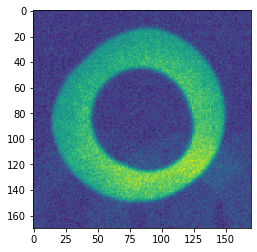

In [8]:
plt.imshow(intraStamps[0].stamp_im.image.array)

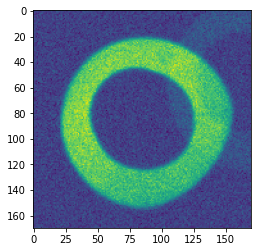

In [9]:
plt.imshow(extraStamps[0].stamp_im.image.array)

In [10]:
from lsst.ts.wep.Utility import CamType, DefocalType, getConfigDir
import os
from lsst.ts.wep.cwfs.Instrument import Instrument

In [11]:
instDataPath = os.path.join(getConfigDir(), 'cwfs', 'instData')
inst = Instrument(instDataPath)
radius_of_donut = 170
inst.config(CamType.LsstCam, radius_of_donut)

In [12]:
stamp = intraStamps[0]
stamp.makeMasks(inst, "offAxis", 5, 1)

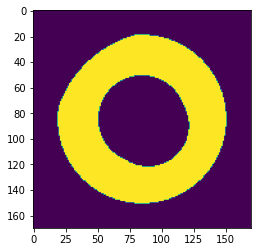

In [13]:
plt.imshow(stamp.mask_comp.array)

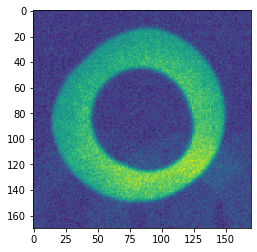

In [14]:
plt.imshow(stamp.stamp_im.image.array)

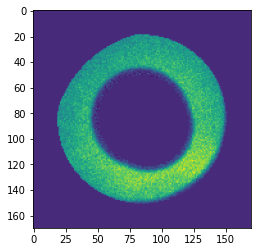

In [19]:
plt.imshow(stamp.stamp_im.image.array * stamp.mask_comp.array)

In [20]:
from lsst.ts.wep.task.EstimateZernikesCwfsTask import (
    EstimateZernikesCwfsTask,
    EstimateZernikesCwfsTaskConfig,
)

In [34]:
# configure the Zernike estimator
zernConfig = EstimateZernikesCwfsTaskConfig()
zernConfig.donutStampSize=170
zernConfig.donutTemplateSize=170

zernTask = EstimateZernikesCwfsTask(config=zernConfig)

# estimate zernikes
est_zernikes = zernTask.estimateZernikes(
    extraStamps, 
    intraStamps,
)

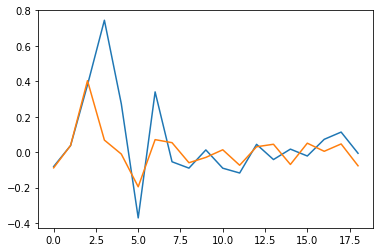

In [35]:
plt.plot(est_zernikes[0])
plt.plot(zs[4:])

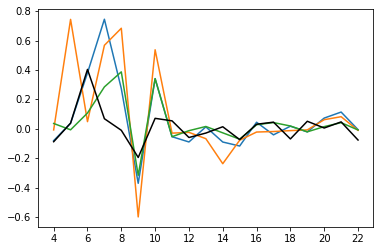

In [36]:
for estZs in est_zernikes:
    plt.plot(np.arange(4, 23), estZs)
    
plt.plot(np.arange(4, 23), zs[4:], c='k')

plt.xticks(np.arange(4, 23, 2))

plt.show()

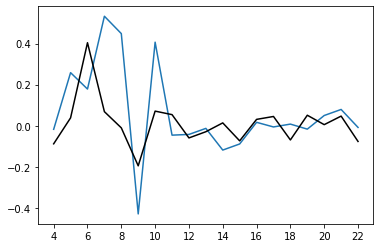

In [38]:
plt.plot(np.arange(4, 23), est_zernikes.mean(axis=0))
    
plt.plot(np.arange(4, 23), zs[4:], c='k')

plt.xticks(np.arange(4, 23, 2))

plt.show()

In [40]:
np.sqrt(np.square(zs[4:] - est_zernikes.mean(axis=0)).sum())

0.8631524576600388

In [39]:
np.sqrt(np.square(zs[4:]).sum())

0.5012843056175785

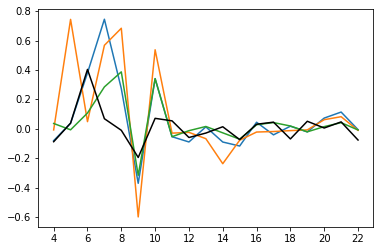

In [31]:
for estZs in est_zernikes:
    plt.plot(np.arange(4, 23), estZs)
    
plt.plot(np.arange(4, 23), zs[4:], c='k')

plt.xticks(np.arange(4, 23, 2))

plt.show()

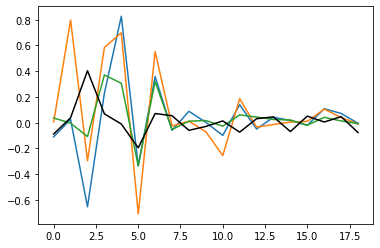

In [140]:
for estZs in est_zernikes:
    plt.plot(estZs)
    
plt.plot(zs[4:], c='k')

In [37]:
zernConfig

lsst.ts.wep.task.EstimateZernikesCwfsTask.EstimateZernikesCwfsTaskConfig(saveMetadata=True, saveLogOutput=True, donutTemplateSize=170, donutStampSize=170, initialCutoutPadding=40, combineZernikes={'sigma': 3.0, 'maxZernClip': 3}, instName='lsst', opticalModel='offAxis', connections={'donutCatalog': 'donutCatalog', 'camera': 'camera', 'donutStampsExtra': 'donutStampsExtra', 'donutStampsIntra': 'donutStampsIntra', 'outputZernikesRaw': 'zernikeEstimateRaw', 'outputZernikesAvg': 'zernikeEstimateAvg', 'exposures': 'postISRCCD'})